In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def kl_divergence(mu, m, Sigma, S):
    det_Sigma = np.linalg.det(Sigma)
    det_S = np.linalg.det(S)
    S_inv = np.linalg.inv(S)

    term1 = np.log(det_S/det_Sigma)+(m-mu).T@S_inv@(m-mu)+np.trace(S_inv@Sigma)-len(mu)
    return (1/2)*term1

def covariance_ellipse(cov, mean, ax, color = "green", n_std = 3):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', edgecolor=color)
    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



def kullback_leibler(mu1_x, mu1_y, mu2_x, mu2_y, cov1_xx, cov1_xy, cov1_yy, cov2_xx, cov2_xy, cov2_yy):

    fig, ax = plt.subplots(figsize=(3, 3))

    mu1 = np.array([mu1_x, mu1_y])
    mu2 = np.array([mu2_x, mu2_y])
    cov1 = np.array([[cov1_xx, cov1_xy], [cov1_xy, cov1_yy]])
    cov2 = np.array([[cov2_xx, cov2_xy], [cov2_xy, cov2_yy]])

    covariance_ellipse(cov1, mu1, ax, color = 'blue')
    covariance_ellipse(cov2, mu2, ax, color = 'red')

    ax.scatter(mu1[0], mu1[1], c='blue', s=3)
    ax.scatter(mu2[0], mu2[1], c='red', s=3)

    plt.show()

    return "kl-divergence: " + str(kl_divergence(mu1, mu2, cov1, cov2))
     
widgets.interact(kullback_leibler, mu1_x = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    mu1_y = widgets.FloatSlider(min=-5, max=5, step=0.1, value=2),
                                    mu2_x = widgets.FloatSlider(min=-5, max=5, step=0.1, value=2),
                                    mu2_y = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    cov1_xx = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=3),
                                    cov1_xy = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    cov1_yy = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=4),
                                    cov2_xx = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2),
                                    cov2_xy = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0),
                                    cov2_yy = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2))

interactive(children=(FloatSlider(value=1.0, description='mu1_x', max=5.0, min=-5.0), FloatSlider(value=2.0, d…

<function __main__.kullback_leibler(mu1_x, mu1_y, mu2_x, mu2_y, cov1_xx, cov1_xy, cov1_yy, cov2_xx, cov2_xy, cov2_yy)>

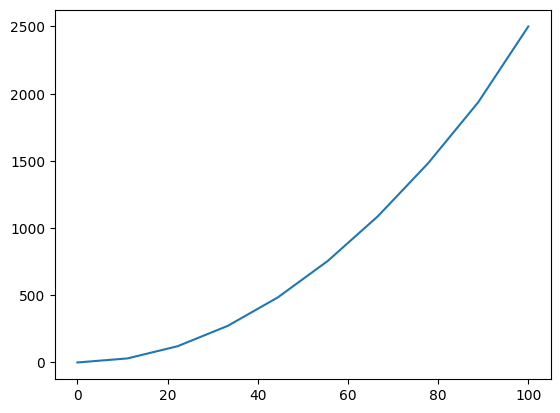

In [3]:

cov1 = np.array([[2, 0], [0, 3]])
cov2 = np.array([[2, 0], [0, 2]])
mu1 = np.array([0, 0])
mu2 = np.array([0, 0])

x = np.linspace(0, 100, 10)

y = []
for i in x:
    mu2[0] = i
    y.append(kl_divergence(mu1, mu2, cov1, cov2))

plt.plot(x, y)

In [34]:
kl_divergence(mu1, [0,5.26315789], cov1, cov2)

6.925207743767312

In [30]:
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])